In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
A = ['Right','Left','Up','Down']
S = list(range(16))
R = -1
P1=[]
for s in S:
    P = []
    if not (s == 0 or s==15):
        for a in A:
            if a == A[0]:
                
                s_new = s+1
            elif a == A[1]:
                s_new = s-1
            elif a == A[2]:
                s_new = s -4
            else:
                s_new = s + 4

            if (a == A[0] and s in [3,7,11,15] or
                a == A[1] and s in [0,4,8,12] or 
                a == A[2] and s in [0,1,2,3] or 
                a == A[3] and s in [12,13,14,15]):
                
                pass
            else:
                item=[s_new,R,s,a]
                if item[0]==15 or item[0]==0:
                    item[1]=0
                    
                P.append(item)
                
    P1.append(P)


P1.pop(0)
P1.pop(-1)

[]

In [4]:
states = len(P1)+2
num_actions =4
# Initialize the policy arbitrarily (uniform random policy)
policy = [[1/4]*len(a) for a in P1 ]


#policy = [1/4]* (states)
V = [0] * (states)
theta = .001
gamma = 0.9
    
V[1:-1] = [random.random() for x in V[1:-1]]

def policy_evaluation(policy,V, P1,gamma, theta):

    
    iteration = 0
    while True:
        i = 0
        delta = 0
        
        for s0 in P1:
            i+=1
            v = V[i]
            V[i] =sum([policy[P1.index(s0)][s0.index(x)]*(x[1]+gamma*V[x[0]]) for x in s0])
         
        delta = max(delta, abs(v- V[i]) )
        if delta < theta:
            break
        #print(delta)
      
    return V
        
def policy_improvement(policy,V, P1,gamma):
    policy_stable = True
    for s in range(states):
        if s == 0 or s == 15:  # Skip terminal states
            continue
            
        old_action = np.argmax(policy[s-1])
        action_values = [(x[1]+gamma*V[x[0]]) for x in P1[s-1]]
        best_action = np.argmax(action_values)
        policy[s-1] = [0] * len(action_values)
        policy[s-1][best_action]=1
        if old_action != best_action:
            policy_stable = False
    return policy, policy_stable

In [5]:
# Policy iteration
while True:
    V = policy_evaluation(policy, V, P1, gamma, theta)
    policy, policy_stable = policy_improvement(policy, V, P1, gamma)
    if policy_stable:
        break

print("Optimal value function:", V)
print("Optimal policy:", policy)

Optimal value function: [0, 0.0, -1.0, -1.9, 0.0, -1.0, -1.9, -1.0, -1.0, -1.9, -1.0, 0.0, -1.9, -1.0, 0.0, 0]
Optimal policy: [[0, 1, 0], [0, 1, 0], [1, 0], [0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 1], [1, 0], [1, 0, 0], [1, 0, 0]]


In [6]:
action_policy = []
for s0 in P1:
    a = []

    for state1,reward,state0,action in s0:
        a.append(round(V[state1],2))

    set_actions_indices=[i for i,j in enumerate(a) if j==max(a)] 
    action_policy.append([s0[x][-1] for x in set_actions_indices])

    


        
        

In [7]:
[i for i,j in enumerate(a) if j==max(a)] 

[0]

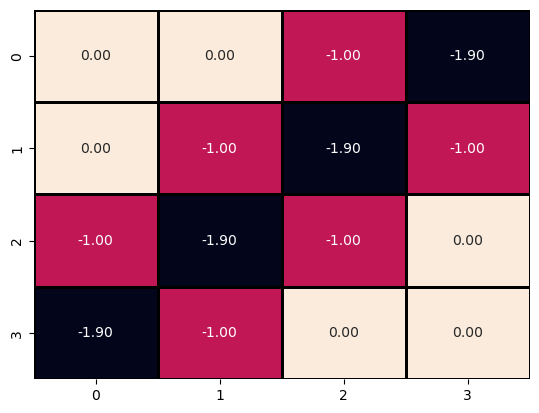

In [8]:
v_array=np.array(V).reshape(4,4)
sns.heatmap(v_array,annot=True,fmt='.2f',cbar=False,lw=1,linecolor='black');

In [9]:
i=0
for _ in action_policy:
    i+=1
    print(i,':',_ )

1 : ['Left']
2 : ['Left']
3 : ['Left', 'Down']
4 : ['Up']
5 : ['Left', 'Up']
6 : ['Right', 'Left', 'Up', 'Down']
7 : ['Down']
8 : ['Up']
9 : ['Right', 'Left', 'Up', 'Down']
10 : ['Right', 'Down']
11 : ['Down']
12 : ['Right', 'Up']
13 : ['Right']
14 : ['Right']


# Confirmation

In [11]:
#v[1,1]

1/4*((-1+v_array[1,0]*.9)+(-1+v_array[0,1]*.9)+(-1+v_array[2,1]*.9)+(-1+v_array[1,2]*.9))

-1.855

In [12]:
#v[1,2]

1/4*((-1+v_array[1,1]*.9)+(-1+v_array[1,3]*.9)+(-1+v_array[0,2]*.9)+(-1+v_array[2,2]*.9))

-1.9

In [13]:
#v[3,1]

1/4*((-1+v_array[3,0]*.9)+(-1+v_array[3,2]*.9)+(-1+v_array[2,1]*.9)+ 0) #(-1+v_array[2,2]*.9))

-1.605

In [14]:
#v[0,1]

1/4*((0 +v_array[0,0]*.9)+(-1+v_array[0,2]*.9)+(-1+v_array[1,1]*.9)+ 0) #(-1+v_array[2,2]*.9))

-0.95

In [15]:
state1,reward,state0,action

(10, -1, 14, 'Up')

In [16]:
-2.38

-2.38

In [17]:
======================================================

SyntaxError: invalid syntax (3187445248.py, line 1)

In [ ]:
evaluation1 = policy_evaluation(policy,V, P1,gamma, theta)

In [ ]:
v_array=np.array(evaluation1).reshape(4,4)
sns.heatmap(v_array,annot=True,fmt='.2f',cbar=False);

In [ ]:
%%time

pi =1/4
teta = 0.008065
V = [0]*16
gamma =.9

for i in range(len(P1)):
    V[i+1]= random.random()

while True:   
    
    error_difference = 0
    
    for s0 in range(len(P1)):
        
        v = V[s0+1]
        
        new_value = 0
        
        for state1,reward,state0,action in P1[s0]:  
            
            new_value+= pi*(reward+ gamma *V[state1])
            
        V[s0+1]=new_value  
        
        error_difference = max(error_difference,abs(v-V[s0+1]))
    if error_difference < teta:
        break
    print(error_difference)


========================================
# MAZE with reward at state 4
=======================================

In [ ]:
transition_prob = np.array(np.zeros(400),dtype=int).reshape(25,4,4)
transition_prob[0]

In [ ]:
# S`,R,S,A
i = 0
transition_prob = np.array(np.zeros(400),dtype=int).reshape(25,4,4)

for state in range(len(transition_prob)):
    
    transition_prob[state][:,2]=i
    transition_prob[state][:,1]=-1
    j=0
    for action in transition_prob[state]:
        action[3]=j
        if state==4:
            transition_prob[state][:,1]=0
        if state==3 and action[3]==1:
            transition_prob[state][1,1]=0
            
        j+=1
    i+=1
    transition_prob[state][:,0] = transition_prob[state][:,2]
    
    if state==0 or state ==9:
        transition_prob[state][3][0]=transition_prob[state][3][2]+5
    if state==1 or state==11 or state==21:
        transition_prob[state][1][0]=transition_prob[state][1][2]+1
    if state==2 or state==6 or state==16 or state==17 or state==22:
        transition_prob[state][0][0]=transition_prob[state][0][2]-1
        transition_prob[state][1][0]=transition_prob[state][1][2]+1
    if state==3 or state == 18:
        transition_prob[state][0][0]=transition_prob[state][0][2]-1
        transition_prob[state][1][0]=transition_prob[state][1][2]+1
        transition_prob[state][3][0]=transition_prob[state][3][2]+5
    if state==5 or state==15:
        transition_prob[state][2][0]=transition_prob[state][2][2]-5
        transition_prob[state][1][0]=transition_prob[state][1][2]+1
        transition_prob[state][3][0]=transition_prob[state][3][2]+5
    if state==7:
        transition_prob[state][0][0]=transition_prob[state][0][2]-1
        transition_prob[state][3][0]=transition_prob[state][3][2]+5
    if state==8 or state==10 or state==14:
        transition_prob[state][2][0]=transition_prob[state][2][2]-5
        transition_prob[state][3][0]=transition_prob[state][3][2]+5
    if state==12 or state==23:
        transition_prob[state][2][0]=transition_prob[state][2][2]-5
        transition_prob[state][0][0]=transition_prob[state][0][2]-1
        transition_prob[state][1][0]=transition_prob[state][1][2]+1
    if state==13 or state==19:
        transition_prob[state][2][0]=transition_prob[state][2][2]-5
        transition_prob[state][0][0]=transition_prob[state][0][2]-1
    if state==20:
        transition_prob[state][2][0]=transition_prob[state][2][2]-5
    if state==24:
        transition_prob[state][0][0]=transition_prob[state][0][2]-1
    
        

In [ ]:
policy = np.zeros(100).reshape(25,4)+.25
policy[4,:]=0
policy

In [ ]:
num_states = 25
V= [0]*num_states
V= [2*random.random() for x in V]
gamma = .9
theta = 0.01
transition_prob 

def policy_evaluation(policy,gamma,theta,V,transition_prob):

    while True:
  
        delta = 0
        for state in range(len(policy)):
            v= V[state]
            if state==4:
                V[state]=0
            else:
                V[state]=sum([(policy[state][actions]*(transition_prob[state][actions][1]+gamma*V[(transition_prob[state][actions][0])])) 
                              for actions in range(len(transition_prob[state]))])
    
            delta = max(delta,abs(v-V[state]))
        if delta<theta:
            break
    return V

def policy_improvement(policy,V,transition_prob,gamma):
    policy_stable = True
    for state in range(num_states):
        
        old_action = np.argmax(policy[state])
        action_values = [(x[1]+gamma*V[x[0]]) for x in transition_prob[state]]
        best_action = np.argmax(action_values)
        new_policy = np.zeros(num_actions)
        new_policy[best_action]=1
        policy[state]=new_policy
        if old_action != best_action:
            policy_stable = False
    return policy, policy_stable

In [ ]:
# Policy iteration
while True:
    V = policy_evaluation(policy,gamma,theta,V,transition_prob)
    policy, policy_stable = policy_improvement(policy, V, transition_prob, gamma)
    if policy_stable:
        break

print("Optimal value function:", V)
print("Optimal policy:", policy)

In [ ]:
evaluated_v = policy_evaluation(policy,gamma,theta,V,transition_prob)

In [ ]:
v_array=np.array(V).reshape(5,5)
sns.heatmap(v_array,annot=True,fmt='.2f',cbar=False);

In [ ]:
v_array=np.array(V).reshape(5,5)
sns.heatmap(v_array,annot=True,fmt='.2f',cbar=False);

In [ ]:
import numpy as np

# Initialize transition probabilities
num_states = 25
num_actions = 4
transition_prob = np.zeros((num_states, num_actions, 4), dtype=int)

# Set the transition probabilities for each state
i = 0
for state in range(num_states):
    # Default assignments
    transition_prob[state][:, 2] = i
    transition_prob[state][:, 1] = -1  # Default reward
    j = 0
    
    for action in transition_prob[state]:
        action[3] = j  # Action index
        if state == 4:
            transition_prob[state][:, 1] = 0  # Zero reward for state 4
        if state == 3 and action[3] == 1:
            transition_prob[state][1, 1] = 0  # Specific condition for state 3, action 1
        j += 1
    
    i += 1
    transition_prob[state][:, 0] = transition_prob[state][:, 2]  # Set next state to current state index
    
    # Special transition rules
    if state == 0 or state == 9:
        transition_prob[state][3][0] = transition_prob[state][3][2] + 5
    if state in [1, 11, 21]:
        transition_prob[state][1][0] = transition_prob[state][1][2] + 1
    if state in [2, 6, 16, 17, 22]:
        transition_prob[state][0][0] = transition_prob[state][0][2] - 1
        transition_prob[state][1][0] = transition_prob[state][1][2] + 1
    if state == 3 or state == 18:
        transition_prob[state][0][0] = transition_prob[state][0][2] - 1
        transition_prob[state][1][0] = transition_prob[state][1][2] + 1
        transition_prob[state][3][0] = transition_prob[state][3][2] + 5
    if state in [5, 15]:
        transition_prob[state][2][0] = transition_prob[state][2][2] - 5
        transition_prob[state][1][0] = transition_prob[state][1][2] + 1
        transition_prob[state][3][0] = transition_prob[state][3][2] + 5
    if state == 7:
        transition_prob[state][0][0] = transition_prob[state][0][2] - 1
        transition_prob[state][3][0] = transition_prob[state][3][2] + 5
    if state in [8, 10, 14]:
        transition_prob[state][2][0] = transition_prob[state][2][2] - 5
        transition_prob[state][3][0] = transition_prob[state][3][2] + 5
    if state in [12, 23]:
        transition_prob[state][2][0] = transition_prob[state][2][2] - 5
        transition_prob[state][0][0] = transition_prob[state][0][2] - 1
        transition_prob[state][1][0] = transition_prob[state][1][2] + 1
    if state in [13, 19]:
        transition_prob[state][2][0] = transition_prob[state][2][2] - 5
        transition_prob[state][0][0] = transition_prob[state][0][2] - 1
    if state == 20:
        transition_prob[state][2][0] = transition_prob[state][2][2] - 5
    if state == 24:
        transition_prob[state][0][0] = transition_prob[state][0][2] - 1


In [ ]:
import numpy as np
import random

# Define number of states and initialize value function
num_states = 25
num_actions = 4
V = np.random.rand(num_states) * 2  # Initialize V with random values between 0 and 2

# Define gamma (discount factor) and theta (threshold for stopping criteria)
gamma = 0.9
theta = 0.001

# Initialize policy with equal probabilities for each action
policy = np.ones((num_states, num_actions)) / num_actions

def policy_evaluation(policy, gamma, theta, V, transition_prob):
    while True:
        delta = 0
        for state in range(num_states):
            v = V[state]
            if state == 4:
                V[state] = 0
            else:
                V[state] = sum(
                    policy[state][action] * (reward + gamma * V[next_state])
                    for action, (next_state, reward, _, _) in enumerate(transition_prob[state])
                )
            delta = max(delta, abs(v - V[state]))
        if delta < theta:
            break
    return V

def policy_improvement(policy, V, transition_prob, gamma):
    policy_stable = True
    for state in range(num_states):
        old_action = np.argmax(policy[state])
        action_values = [
            reward + gamma * V[next_state]
            for next_state, reward, _, _ in transition_prob[state]
        ]
        best_action = np.argmax(action_values)
        policy[state] = np.eye(num_actions)[best_action]
        if old_action != best_action:
            policy_stable = False
    return policy, policy_stable

# Example of running policy iteration
V = policy_evaluation(policy, gamma, theta, V, transition_prob)
policy, policy_stable = policy_improvement(policy, V, transition_prob, gamma)

print(f"Value Function: {V}")
print(f"Policy Stable: {policy_stable}")
print(f"Policy: {policy}")


In [ ]:
v_array=np.array(V).reshape(5,5)
sns.heatmap(v_array,annot=True,fmt='.2f',cbar=False);

In [ ]:
transition_prob[0]

In [ ]:
import numpy as np
import random

# Define number of states and initialize value function
num_states = 25
num_actions = 4
V = np.random.rand(num_states) * 2  # Initialize V with random values between 0 and 2

# Define gamma (discount factor) and theta (threshold for stopping criteria)
gamma = 0.9
theta = 0.01

# Initialize policy with equal probabilities for each action
policy = np.ones((num_states, num_actions)) / num_actions

def policy_evaluation(policy, gamma, theta, V, transition_prob):
    while True:
        delta = 0
        for state in range(num_states):
            v = V[state]
            if state == 4:
                V[state] = 0
            else:
                V[state] = sum(
                    policy[state][action] * (reward + gamma * V[next_state])
                    for action, (next_state, reward, _, _) in enumerate(transition_prob[state])
                )
            delta = max(delta, abs(v - V[state]))
        if delta < theta:
            break
    return V

def policy_improvement(policy, V, transition_prob, gamma):
    policy_stable = True
    for state in range(num_states):
        old_action = np.argmax(policy[state])
        action_values = [
            reward + gamma * V[next_state]
            for next_state, reward, _, _ in transition_prob[state]
        ]
        best_action = np.argmax(action_values)
        # Create a new deterministic policy for this state
        new_policy = np.zeros(num_actions)
        new_policy[best_action] = 1.0
        policy[state] = new_policy
        if old_action != best_action:
            policy_stable = False
    return policy, policy_stable

# Run policy iteration
policy_stable = False
while not policy_stable:
    V = policy_evaluation(policy, gamma, theta, V, transition_prob)
    policy, policy_stable = policy_improvement(policy, V, transition_prob, gamma)

print(f"Value Function: {V}")
print(f"Policy Stable: {policy_stable}")
print(f"Optimal Policy: {policy}")


In [ ]:
v_array=np.array(V).reshape(5,5)
sns.heatmap(v_array,annot=True,fmt='.2f',cbar=False);

In [ ]:
for action, (next_state, reward, _, _) in enumerate(transition_prob[state]):
    print((next_state, reward, _, _))